## Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

- Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing impact of employee salaries on retention
- Plot bar charts showing corelation between department and employee retention
- Now build logistic regression model using variables that were narrowed down in step 1
- Measure the accuracy of the model

## Predicting if a person would leave the company or continue to work using logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
df = pd.read_csv('HR_analytics.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Visualisation and Exploration

In [8]:
# employees left
left = df[df['left'] ==1]
left.shape

(3571, 10)

In [9]:
# employees still present 
retained = df[df['left'] == 0]
retained.shape

(11428, 10)

## average numbers for all columns

In [17]:
df.groupby('left').mean(numeric_only = True) ## numeric only is used to compare only the columns containing numeric values

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

- **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the company vs the retained ones (0.66)
- **Average Monthly Hours**: Average monthly hours are higher in employees leaving the company (199 vs 207)
- **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at company

### impact of salary on employee retention

Text(0.5, 1.0, 'salary vs employee left')

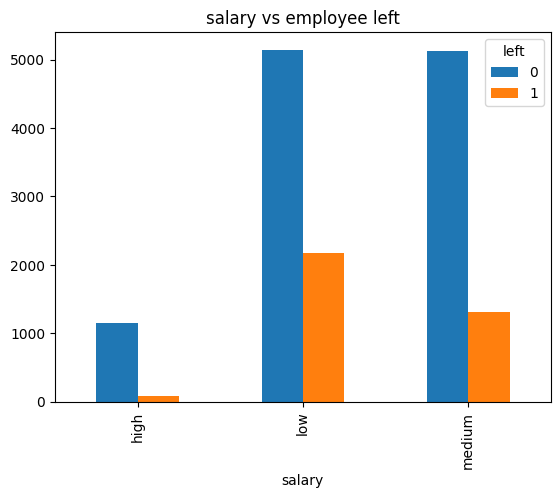

In [23]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')
plt.title("salary vs employee left")

from above graph person with high salary are likely not to leave the company

### Department wise employee retention rate

Text(0.5, 1.0, 'Department vs employee left')

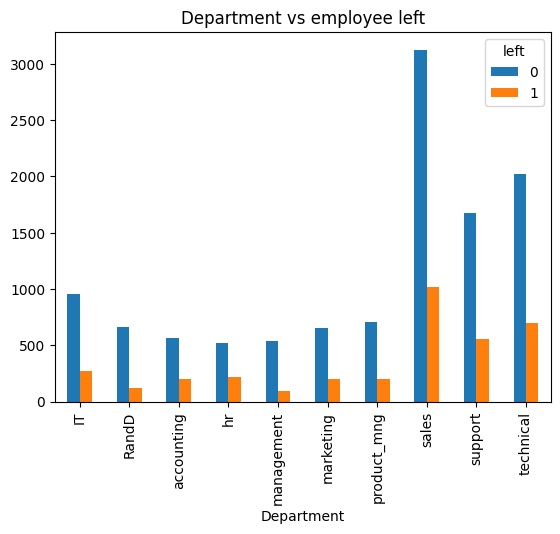

In [25]:
pd.crosstab(df.Department,df.left).plot(kind= 'bar')
plt.title("Department vs employee left")

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

## From the above data analysis we conclude that we will use the following independent variables in our model

- **Satisfaction Level**
- **Average Monthly Hours**
- **Promotion Last 5 Years**
- **Salary**

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### now handling salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that

In [36]:
dummies = pd.get_dummies(subdf['salary'], prefix = 'salary').astype(int)
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [43]:
merged = pd.concat([subdf,dummies], axis = 'columns')
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


### now drop the salary column and also one of the dummy variable column to avoid dummy variable trap

In [52]:
final = merged.drop(['salary','salary_medium'], axis = 'columns')
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


## now making the logistic regression model

In [54]:
X = final
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [56]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 500)

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train,y_test = train_test_split(X,y ,test_size = 0.3)

In [71]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

#### now our model is made lets predict

In [72]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(4500,))

## accuracy of the model

In [74]:
model.score(X_test,y_test)

0.778